In [1]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from IPython.display import Image

# 1 - Construction du modèle

### <ul> <li> Le modèle entier et les distributions de probabilité sont représenté sur la figure suivante </li> </ul>

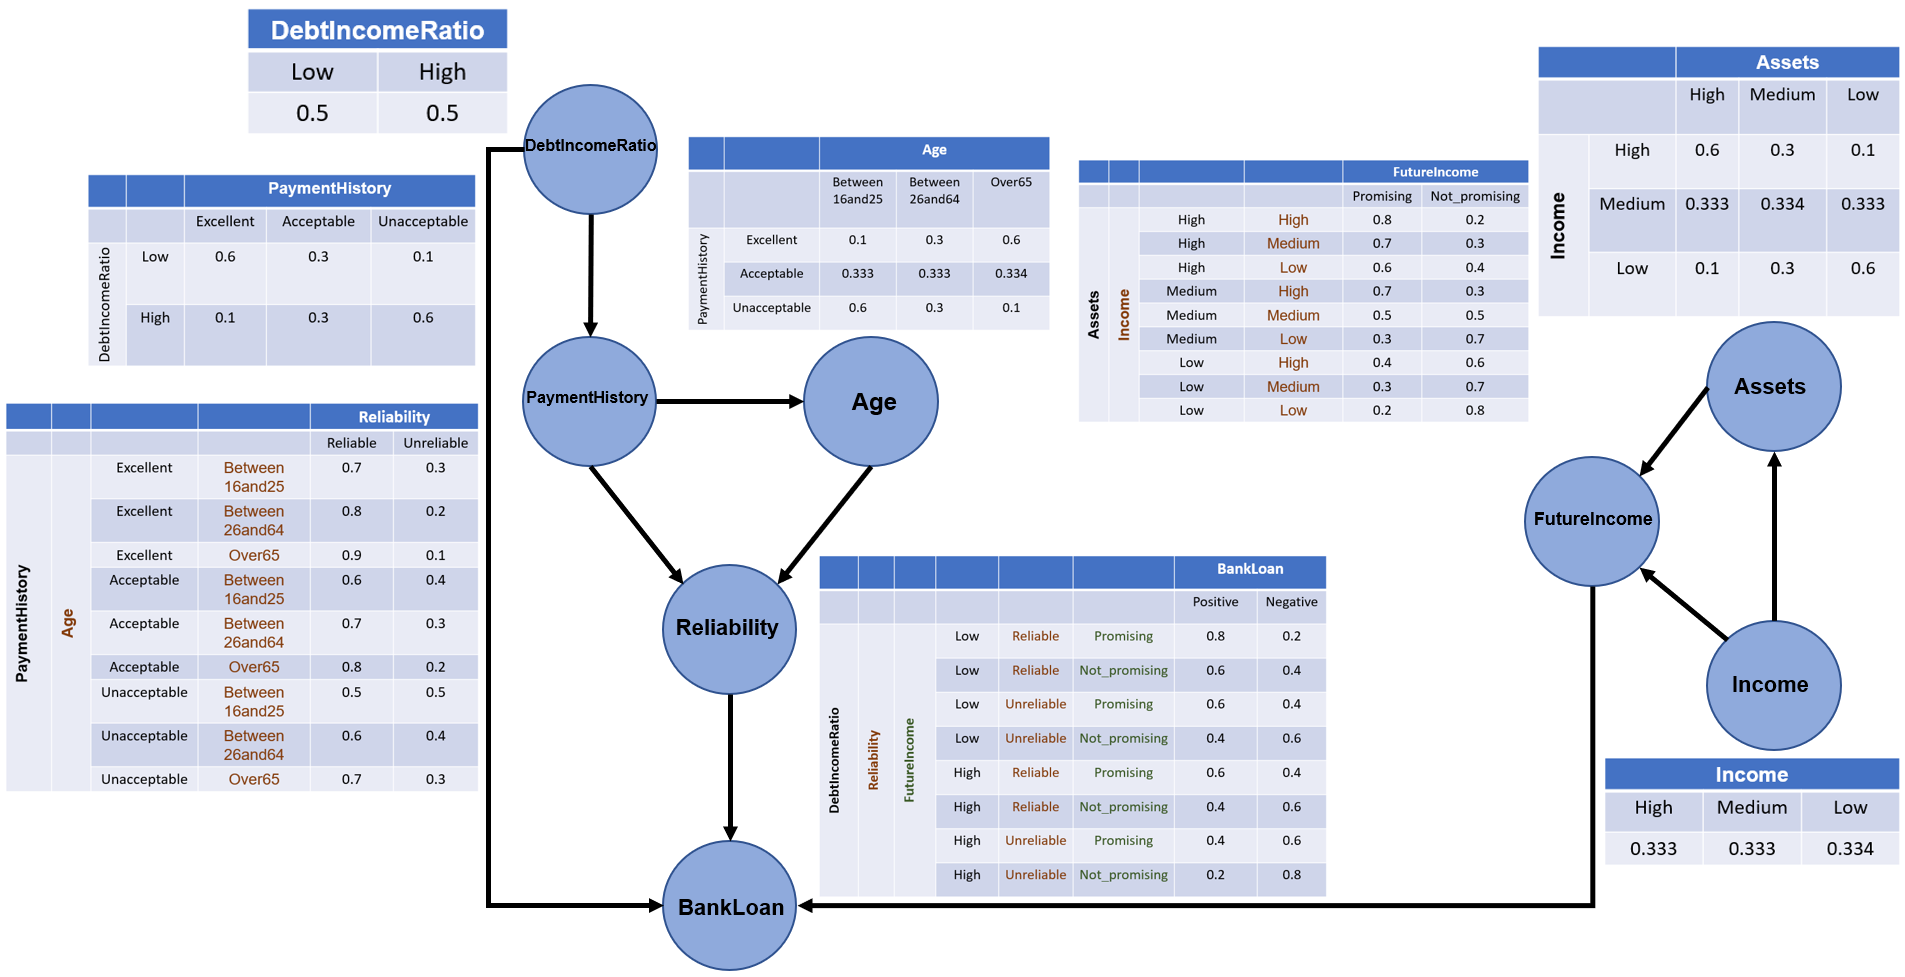

In [2]:
Image('network.PNG')

### <ul> <li> Les CPD permettant de satisfaire les observations 5 et 6 </li> </ul>

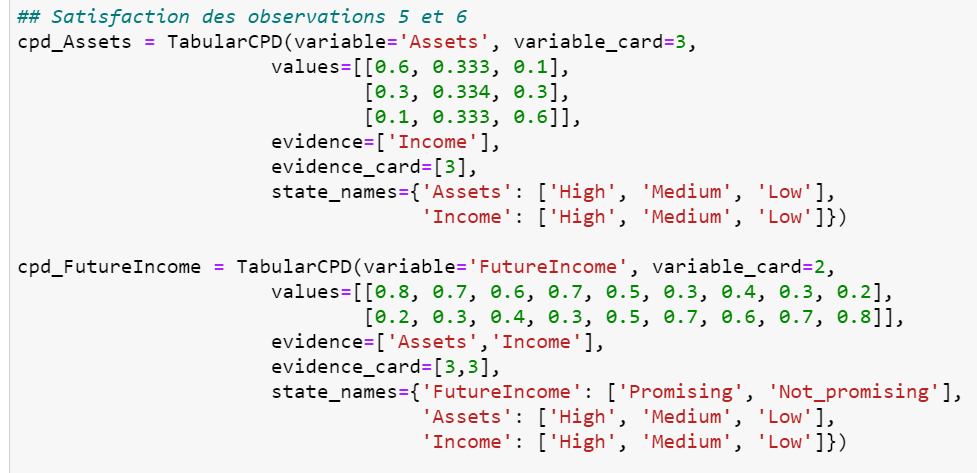

In [3]:
Image('5 et 6.PNG', width = 600, height = 300)

### <ul> <li> Construction du modèle </li> </ul>

In [4]:
# Defining the model structure. We can define the network by just passing a list of edges.
model = BayesianModel([('DebtIncomeRatio', 'PaymentHistory'), ('PaymentHistory', 'Age'), ('PaymentHistory', 'Reliability'), ('Age', 'Reliability'), ('Income','Assets'),
('Income', 'FutureIncome'),('Assets', 'FutureIncome'),('DebtIncomeRatio', 'BankLoan'),('Reliability', 'BankLoan'),('FutureIncome', 'BankLoan')])


# Defining individual CPDs.
cpd_DebtIncomeRatio = TabularCPD(variable='DebtIncomeRatio', variable_card=2, values=[[0.5], [0.5]], state_names={'DebtIncomeRatio': ['Low', 'High']})
cpd_Income = TabularCPD(variable='Income', variable_card=3, values=[[0.333], [0.333], [0.334]], state_names={'Income': ['High', 'Medium', 'Low']})


# The representation of CPD in pgmpy is a bit different than the CPD shown in the above picture. In pgmpy the colums
# are the evidences and rows are the states of the variable. So the grade CPD is represented like this:
#
#    +----------------+----------------+----------------+-----------+----------------+----------------+------------+----------------+----------------+--------------+
#    | PaymentHistory |   Excellent    |    Excellent   | Excellent |   Acceptable   |   Acceptable   | Acceptable |  Unacceptable  |  Unacceptable  | Unacceptable |
#    +----------------+----------------+----------------+-----------+----------------+----------------+------------+----------------+----------------+--------------+
#    | Age            | Between16and25 | Between26and64 |   Over65  | Between16and25 | Between26and64 |   Over65   | Between16and25 | Between26and64 |    Over65    |
#    +----------------+----------------+----------------+-----------+----------------+----------------+------------+----------------+----------------+--------------+
#    | Reliability_0  |       0.7      |       0.8      |    0.9    |       0.6      |       0.7      |     0.8    |       0.5      |       0.6      |      0.7     |
#    +----------------+----------------+----------------+-----------+----------------+----------------+------------+----------------+----------------+--------------+
#    | Reliability_1  |       0.3      |       0.2      |    0.1    |       0.4      |       0.3      |     0.2    |       0.5      |       0.4      |      0.3     |
#    +----------------+----------------+----------------+-----------+----------------+----------------+------------+----------------+----------------+--------------+


cpd_Reliability = TabularCPD(variable='Reliability', variable_card=2,
                      values=[[0.7, 0.8, 0.9, 0.6, 0.7, 0.8, 0.5, 0.6, 0.7],
                              [0.3, 0.2, 0.1, 0.4, 0.3, 0.2, 0.5, 0.4, 0.3],],
                      evidence=['PaymentHistory','Age'],
                      evidence_card=[3,3],
                      state_names={'Reliability': ['Reliable', 'Unreliable'],
                                   'PaymentHistory': ['Excellent', 'Acceptable', 'Unacceptable'],
                                   'Age': ['Between16and25', 'Between26and64', 'Over65']})

cpd_Age = TabularCPD(variable='Age', variable_card=3, 
                      values=[[0.1, 0.333, 0.6],
                              [0.3, 0.333, 0.3],
                              [0.6, 0.334, 0.1]],
                      evidence=['PaymentHistory'],
                      evidence_card=[3],
                      state_names={'Age': ['Between16and25', 'Between26and64', 'Over65'],
                                   'PaymentHistory': ['Excellent', 'Acceptable', 'Unacceptable']})


cpd_PaymentHistory = TabularCPD(variable='PaymentHistory', variable_card=3, 
                      values=[[0.6, 0.1],
                              [0.3, 0.3],
                              [0.1, 0.6]],
                      evidence=['DebtIncomeRatio'],
                      evidence_card=[2],
                      state_names={'PaymentHistory': ['Excellent', 'Acceptable', 'Unacceptable'],
                                   'DebtIncomeRatio': ['Low', 'High']})

cpd_BankLoan = TabularCPD(variable='BankLoan', variable_card=2, 
                      values=[[0.8, 0.6, 0.6, 0.4, 0.6, 0.4, 0.4, 0.2],
                              [0.2, 0.4, 0.4, 0.6, 0.4, 0.6, 0.6, 0.8]],
                      evidence=['DebtIncomeRatio','Reliability','FutureIncome'],
                      evidence_card=[2,2,2],
                      state_names={'BankLoan': ['Positive', 'Negative'],
                                   'DebtIncomeRatio': ['Low', 'High'],
                                   'Reliability': ['Reliable', 'Unreliable'],
                                   'FutureIncome': ['Promising', 'Not_promising']})


## Satisfaction des observations 5 et 6
cpd_Assets = TabularCPD(variable='Assets', variable_card=3, 
                      values=[[0.6, 0.333, 0.1],
                              [0.3, 0.334, 0.3],
                              [0.1, 0.333, 0.6]],
                      evidence=['Income'],
                      evidence_card=[3],
                      state_names={'Assets': ['High', 'Medium', 'Low'],
                                   'Income': ['High', 'Medium', 'Low']})

cpd_FutureIncome = TabularCPD(variable='FutureIncome', variable_card=2, 
                      values=[[0.8, 0.7, 0.6, 0.7, 0.5, 0.3, 0.4, 0.3, 0.2],
                              [0.2, 0.3, 0.4, 0.3, 0.5, 0.7, 0.6, 0.7, 0.8]],
                      evidence=['Assets','Income'],
                      evidence_card=[3,3],
                      state_names={'FutureIncome': ['Promising', 'Not_promising'],
                                   'Assets': ['High', 'Medium', 'Low'],
                                   'Income': ['High', 'Medium', 'Low']})

# {'DebtIncomeRatio': ['Low', 'High']})
# {'Income': ['High', 'Medium', 'Low']})
# {'PaymentHistory': ['Excellent', 'Acceptable', 'Unacceptable']}
# {'Age': ['Between16and25', 'Between26and64', 'Over65']}
# {'Reliability': ['Reliable', 'Unreliable']}
# {'Assets': ['High', 'Medium', 'Low']}
# {'FutureIncome': ['Promising', 'Not_promising']}
# {'BankLoan': ['Positive', 'Negative']}


model.add_cpds(cpd_DebtIncomeRatio, cpd_Income, cpd_Reliability, cpd_Age, cpd_PaymentHistory, cpd_BankLoan, cpd_Assets, cpd_FutureIncome)
model.check_model()

True

# 2 - Indépendance entre les variables

### <ul> <li> Les indépendances locales entre les variables. </li> </ul>

In [5]:
# Getting all the local independencies in the network.
print('Les indépendances locales entre les variables en utilisant la méthode  model.local_independencies() :')
model.local_independencies(['DebtIncomeRatio', 'Income', 'Reliability', 'Age', 'PaymentHistory', 'BankLoan', 'Assets', 'FutureIncome'])

Les indépendances locales entre les variables en utilisant la méthode  model.local_independencies() :


(DebtIncomeRatio _|_ Income, Assets, FutureIncome)
(Income _|_ DebtIncomeRatio, PaymentHistory, Age, Reliability)
(Reliability _|_ Income, Assets, FutureIncome, DebtIncomeRatio | PaymentHistory, Age)
(Age _|_ Income, Assets, FutureIncome, DebtIncomeRatio | PaymentHistory)
(PaymentHistory _|_ Income, Assets, FutureIncome | DebtIncomeRatio)
(BankLoan _|_ Income, Assets, Age, PaymentHistory | DebtIncomeRatio, FutureIncome, Reliability)
(Assets _|_ DebtIncomeRatio, PaymentHistory, Age, Reliability | Income)
(FutureIncome _|_ DebtIncomeRatio, PaymentHistory, Age, Reliability | Income, Assets)

### <ul> <li> Les variables aléatoires qui sont indépendantes de "Income". </ul> </li>

In [6]:
variables = {'DebtIncomeRatio', 'Income', 'Reliability', 'Age', 'PaymentHistory', 'BankLoan', 'Assets', 'FutureIncome'}
var = model.active_trail_nodes('Income').values()
temp = {}
for v in var:
    temp = v
print('Les variables aléatoires qui sont indépendantes de "Income" sont :\n')
print(variables - temp)

Les variables aléatoires qui sont indépendantes de "Income" sont :

{'DebtIncomeRatio', 'PaymentHistory', 'Age', 'Reliability'}


### <ul> <li>  Les variables aléatoires qui sont indépendantes de "Income" étant donné "BankLoan". </ul> </li>

In [7]:
variables = {'DebtIncomeRatio', 'Income', 'Reliability', 'Age', 'PaymentHistory', 'BankLoan', 'Assets', 'FutureIncome'}
var = model.active_trail_nodes('Income', observed='BankLoan').values()
temp = {}
for v in var:
    temp = v
print('Les variablesaléatoires qui sont indépendantes de "Income" étant donné "BankLoan" sont :\n')
print(variables - temp)

Les variablesaléatoires qui sont indépendantes de "Income" étant donné "BankLoan" sont :

{'BankLoan'}


# 3 - Apprentissage par maximum de vraisemblance

### <ul> <li> Lecture des données et définition de la structure du modèle </ul> </li>

In [8]:
import pandas as pd
df_train = pd.read_csv('50000-cases.csv', header=0)

In [9]:
# Defining the model structure. We can define the network by just passing a list of edges.
model_MLE = BayesianModel([('DebtIncomeRatio', 'PaymentHistory'), ('PaymentHistory', 'Age'), ('PaymentHistory', 'Reliability'), ('Age', 'Reliability'), ('Income','Assets'),
('Income', 'FutureIncome'),('Assets', 'FutureIncome'),('DebtIncomeRatio', 'BankLoan'),('Reliability', 'BankLoan'),('FutureIncome', 'BankLoan')])

### <ul> <li> Maximum Likelihood Estimation </ul> </li>

In [10]:
from pgmpy.estimators import MaximumLikelihoodEstimator
mle = MaximumLikelihoodEstimator(model_MLE, df_train)

### <ul> <li> Estimation of the CPD of each variable  </ul> </li>

In [11]:
variables = ['DebtIncomeRatio', 'Income', 'Reliability', 'Age', 'PaymentHistory', 'BankLoan', 'Assets', 'FutureIncome']
for v in variables:
    print("CPD of ",v )
    print(mle.estimate_cpd(v))  
    print('\n')

CPD of  DebtIncomeRatio
+-----------------------+---------+
| DebtIncomeRatio(High) | 0.50138 |
+-----------------------+---------+
| DebtIncomeRatio(Low)  | 0.49862 |
+-----------------------+---------+


CPD of  Income
+----------------+---------+
| Income(High)   | 0.33454 |
+----------------+---------+
| Income(Low)    | 0.33286 |
+----------------+---------+
| Income(Medium) | 0.3326  |
+----------------+---------+


CPD of  Reliability
+-------------------------+----------------------------+---------------------------+------------------------------+----------------------------+---------------------------+------------------------------+----------------------------+---------------------------+------------------------------+
| Age                     | Age(Between16and25)        | Age(Between16and25)       | Age(Between16and25)          | Age(Between26and64)        | Age(Between26and64)       | Age(Between26and64)          | Age(Over65)                | Age(Over65)               | A

### <ul> <li> Comparaison between the defined CPDs and the learned CPDs of each variable  </ul> </li>

Après comparaison, on peut en déduire que le CPDs apprises est presque équivalent aux CPDs définient manuellement.

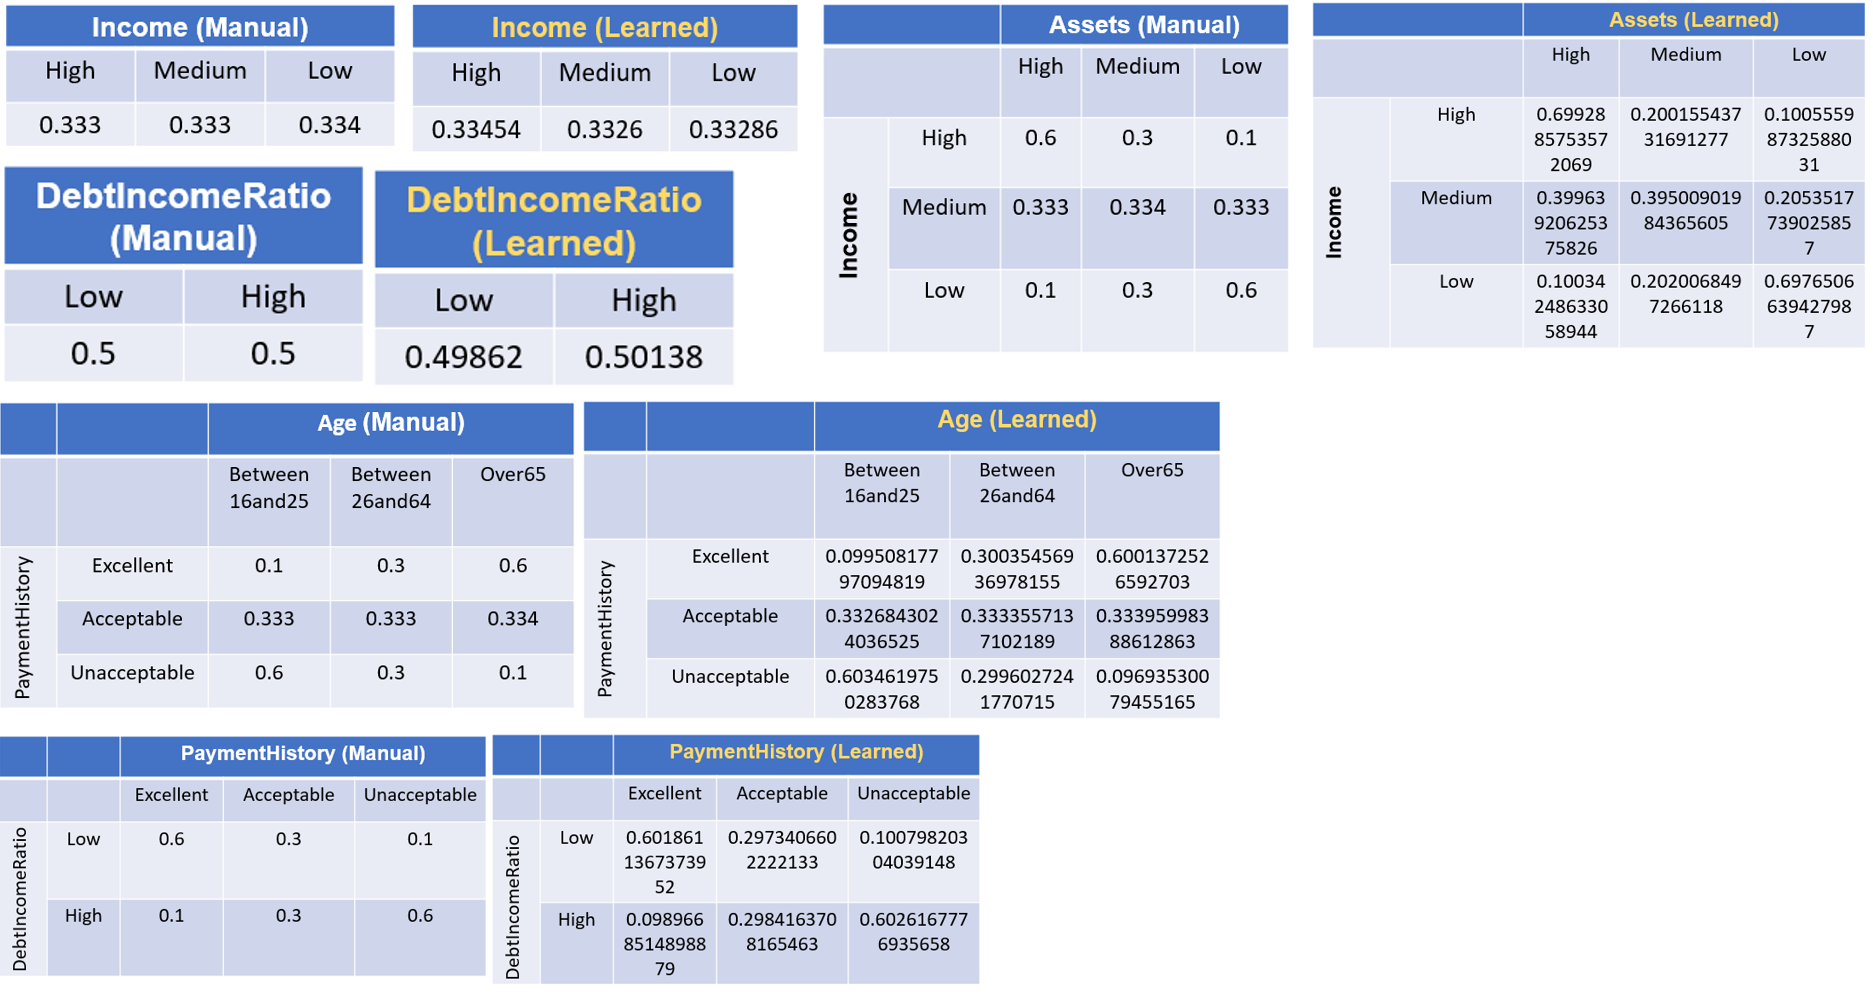

In [12]:
Image('CPD_1.PNG')

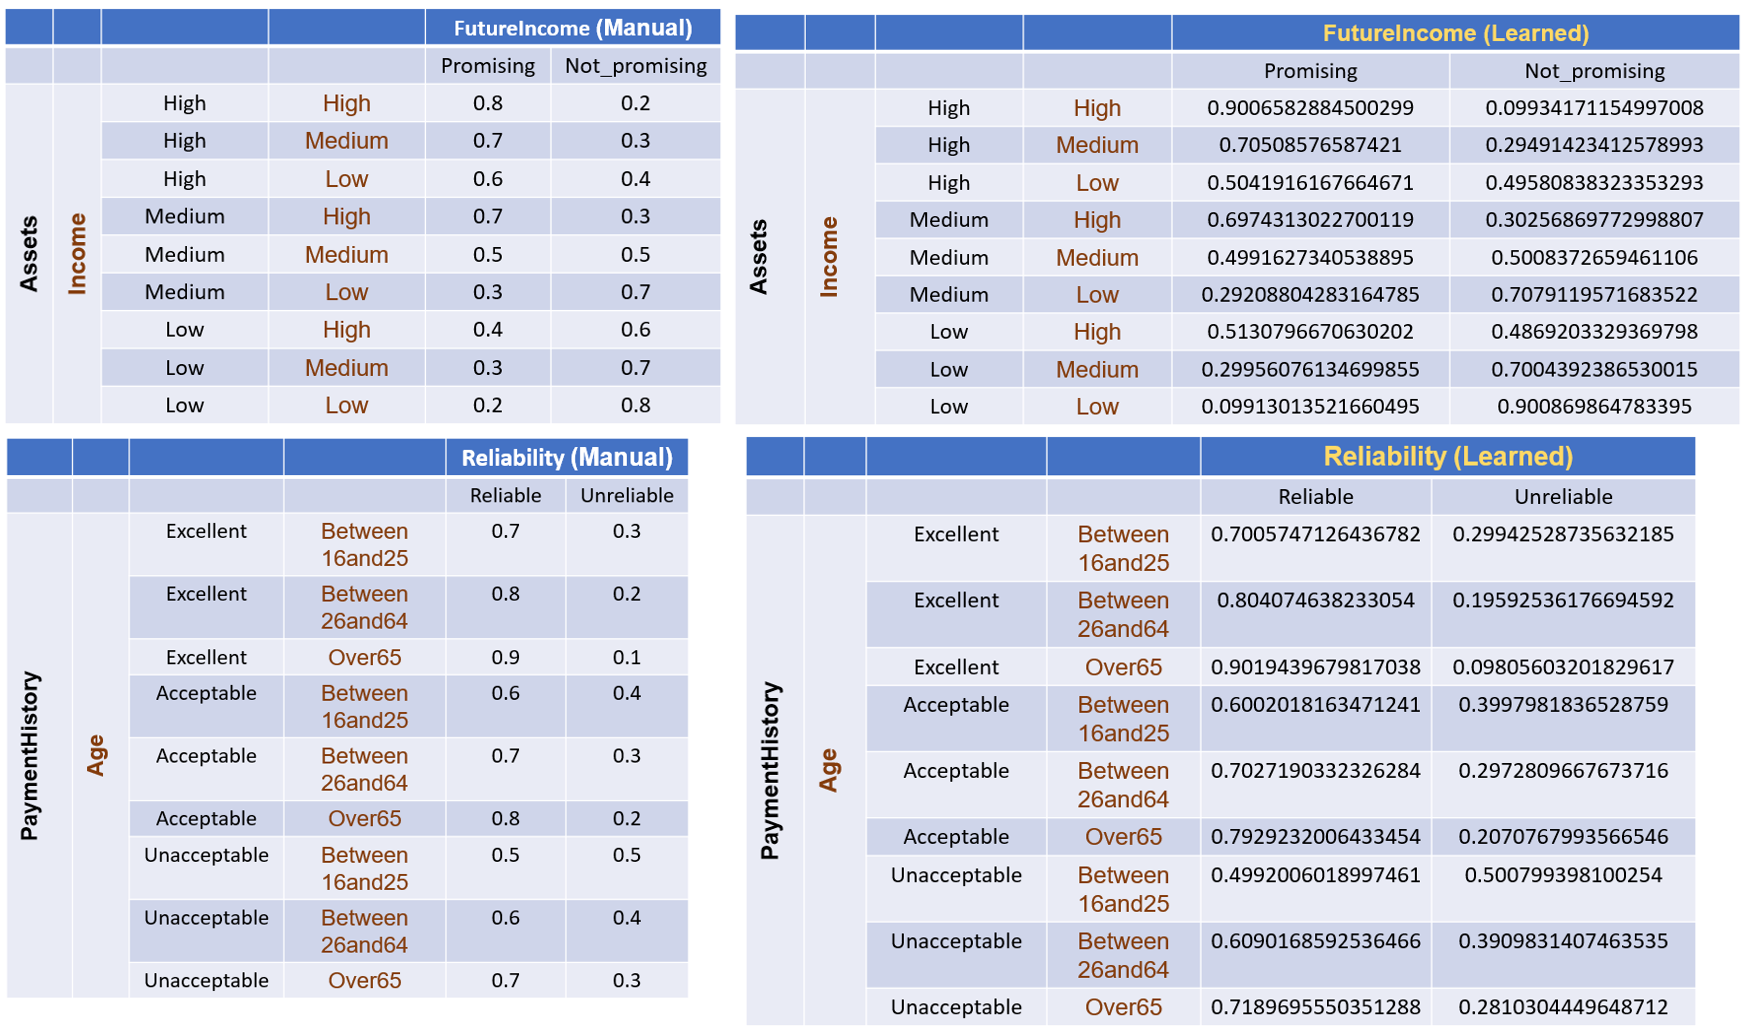

In [13]:
Image('CPD_2.PNG')

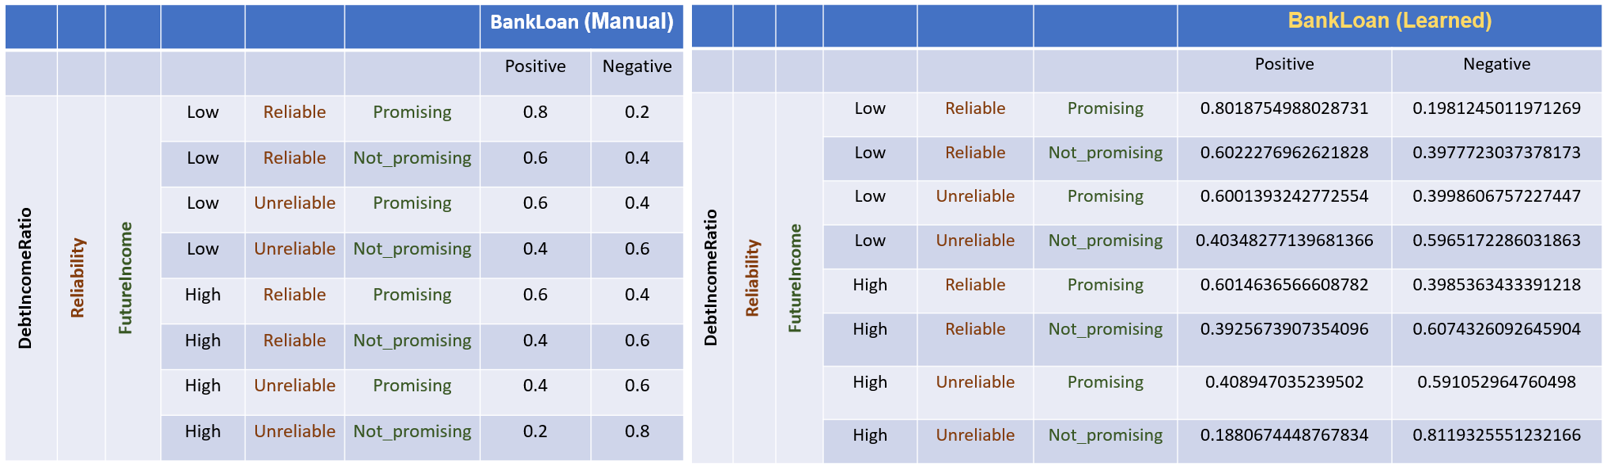

In [14]:
Image('CPD_3.PNG')

### <ul> <li> The built-in fit()-method of BayesianModel provides more convenient access to parameter estimators  </ul> </li>

In [15]:
# Calibrate all CPDs of `model` using MLE:
model_MLE.fit(df_train, estimator=MaximumLikelihoodEstimator)

In [16]:
### <ul> <li>   </ul> </li>

# 4 - Inférence exacte

In [17]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model_MLE)

### <ul> <li> P (BankLoan)  </ul> </li>

In [18]:
print(infer.query(['BankLoan'], show_progress=False))

+--------------------+-----------------+
| BankLoan           |   phi(BankLoan) |
+====================+=================+
| BankLoan(Negative) |          0.4574 |
+--------------------+-----------------+
| BankLoan(Positive) |          0.5426 |
+--------------------+-----------------+


### <ul> <li> P (BankLoan|Income = Low, Age = Between16and25, PaymentHistory = Excellent, Assets = Low) </ul> </li>

In [19]:
print(infer.query(['BankLoan'], evidence={'Income': 'Low', 'Age': 'Between16and25', 'PaymentHistory':'Excellent','Assets':'Low'},  show_progress=False))

+--------------------+-----------------+
| BankLoan           |   phi(BankLoan) |
+====================+=================+
| BankLoan(Negative) |          0.4674 |
+--------------------+-----------------+
| BankLoan(Positive) |          0.5326 |
+--------------------+-----------------+


### <ul> <li> P (BankLoan|Income = High, Age = Between16and25, PaymentHistory = Excellent, Assets = High)  </ul> </li>

In [20]:
print(infer.query(['BankLoan'], evidence={'Income': 'High', 'Age': 'Between16and25','PaymentHistory':'Excellent','Assets':'High'},  show_progress=False))

+--------------------+-----------------+
| BankLoan           |   phi(BankLoan) |
+====================+=================+
| BankLoan(Negative) |          0.3065 |
+--------------------+-----------------+
| BankLoan(Positive) |          0.6935 |
+--------------------+-----------------+


### <ul> <li> P (BankLoan|Income = High, Age = Over65, PaymentHistory = Excellent, Assets = High) </ul> </li>

In [21]:
print(infer.query(['BankLoan'], evidence={'Income': 'High', 'Age': 'Over65','PaymentHistory':'Excellent','Assets':'High'},show_progress=False))

+--------------------+-----------------+
| BankLoan           |   phi(BankLoan) |
+====================+=================+
| BankLoan(Negative) |          0.2662 |
+--------------------+-----------------+
| BankLoan(Positive) |          0.7338 |
+--------------------+-----------------+


# 5 - Inférence par échantillonnage en avant

In [22]:
from pgmpy.sampling import BayesianModelSampling
from pgmpy.factors.discrete import State

In [23]:
###################### 5 - Inférence par échantillonnage en avant ############################

# BUG: remove state names that are not supported for several sampling functions by the library
# and store the feature index
dictionary = {}
for feature in df_train.columns:
    dictionary[feature] = model_MLE.get_cpds(feature).state_names[feature]
    model_MLE.get_cpds(feature).state_names = {}

    
# for cpd in model_MLE.get_cpds():
#     print("CPD of {variable}:".format(variable=cpd.variable))
#     print(cpd)
model_MLE.check_model()

True

### <ul> <li> P (BankLoan)  </ul> </li>

In [24]:
inference = BayesianModelSampling(model_MLE)
df = inference.forward_sample(size=10000, return_type='dataframe',  show_progress=False)

In [25]:
series_BankLoan = df['BankLoan'].value_counts()
print('Phi(BankLoan = Negative) = ',series_BankLoan[0]/(sum(series_BankLoan)) )
print('Phi(BankLoan = Positive) =',series_BankLoan[1]/(sum(series_BankLoan)) )

Phi(BankLoan = Negative) =  0.4528
Phi(BankLoan = Positive) = 0.5472


### <ul> <li> P (BankLoan|Income = Low, Age = Between16and25, PaymentHistory = Excellent, Assets = Low) </ul> </li>

In [26]:
evidence1 = [State(var='Income', state=dictionary['Income'].index('Low')), State(var='Age', state=dictionary['Age'].index('Between16and25')), State(var='PaymentHistory', state=dictionary['PaymentHistory'].index('Excellent')), State(var='Assets', state=dictionary['Assets'].index('Low'))]
df = inference.rejection_sample(evidence=evidence1, size=10000, return_type='dataframe',  show_progress=False)

Generating for node: BankLoan: 100%|█████████████████████████████████████████████████████| 8/8 [01:19<00:00,  9.97s/it]


In [27]:
series_BankLoan = df['BankLoan'].value_counts()
print('Phi(BankLoan = Negative) = ',series_BankLoan[0]/(sum(series_BankLoan)) )
print('Phi(BankLoan = Positive) =',series_BankLoan[1]/(sum(series_BankLoan)) )

Phi(BankLoan = Negative) =  0.4727
Phi(BankLoan = Positive) = 0.5273


### <ul> <li> P (BankLoan|Income = High, Age = Between16and25, PaymentHistory = Excellent, Assets = High)  </ul> </li>

In [28]:
evidence2 = [State(var='Income', state=dictionary['Income'].index('High')), State(var='Age', state=dictionary['Age'].index('Between16and25')), State(var='PaymentHistory', state=dictionary['PaymentHistory'].index('Excellent')), State(var='Assets', state=dictionary['Assets'].index('High'))]
df = inference.rejection_sample(evidence=evidence2, size=10000, return_type='dataframe',  show_progress=False)

Generating for node: BankLoan: 100%|█████████████████████████████████████████████████████| 8/8 [01:20<00:00, 10.11s/it]


In [29]:
series_BankLoan = df['BankLoan'].value_counts()
print('Phi(BankLoan = Negative) = ',series_BankLoan[0]/(sum(series_BankLoan)) )
print('Phi(BankLoan = Positive) =',series_BankLoan[1]/(sum(series_BankLoan)) )

Phi(BankLoan = Negative) =  0.3185
Phi(BankLoan = Positive) = 0.6815


### <ul> <li> P (BankLoan|Income = High, Age = Over65, PaymentHistory = Excellent, Assets = High) </ul> </li>

In [30]:
evidence3 = [State(var='Income', state=dictionary['Income'].index('High')), State(var='Age', state=dictionary['Age'].index('Over65')), State(var='PaymentHistory', state=dictionary['PaymentHistory'].index('Excellent')), State(var='Assets', state=dictionary['Assets'].index('High'))]
df = inference.rejection_sample(evidence=evidence3, size=10000, return_type='dataframe',  show_progress=False)

Generating for node: BankLoan: 100%|█████████████████████████████████████████████████████| 8/8 [00:16<00:00,  2.10s/it]


In [31]:
series_BankLoan = df['BankLoan'].value_counts()
print('Phi(BankLoan = Negative) = ',series_BankLoan[0]/(sum(series_BankLoan)) )
print('Phi(BankLoan = Positive) =',series_BankLoan[1]/(sum(series_BankLoan)) )

Phi(BankLoan = Negative) =  0.271
Phi(BankLoan = Positive) = 0.729


### <ul> <li> Comparaison entre l'inférence exacte et Inférence par échantillonnage en avant  </ul> </li>

* Les résultats sont presque équivalent en terme de valeur.

* En terme de temps, l'inférence exacte est plus rapide car la structure du modèle est assez simple et l'Inférence par échantillonnage en avant prends plus de temps en fonction du nombre d'échantillons à générer.

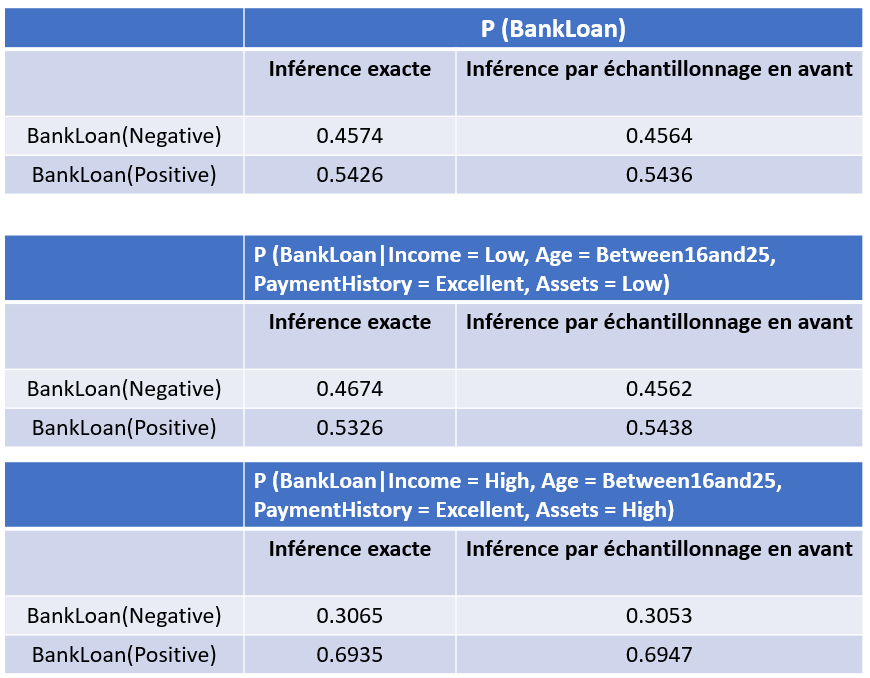

In [32]:
Image('result1.PNG', width = 600, height = 300)

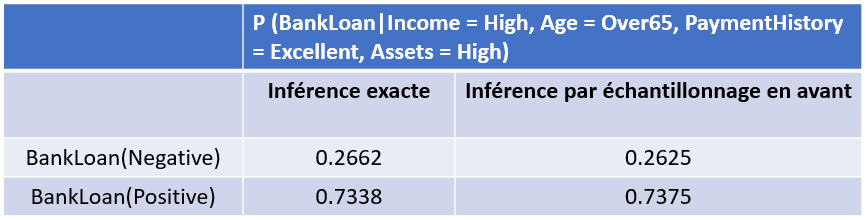

In [33]:
Image('result2.PNG', width = 600, height = 300)

# 6 - Inférence avec la méthode de Monte Carlo par chaînes de Markov

### <ul> <li> Importation de la bibliothèque GibbsSampling  </ul> </li>

In [34]:
from pgmpy.sampling import GibbsSampling

### <ul> <li> Génération de 10 000 échantillons et calcule de "P (BankLoan)" </ul> </li>

In [35]:
gibbs = GibbsSampling(model_MLE)
df = gibbs.sample(size=10000, return_type='dataframe')

100%|█████████████████████████████████████████████████████████████████████████████| 9999/9999 [00:16<00:00, 599.18it/s]


In [36]:
series_BankLoan = df['BankLoan'].value_counts()
print('Phi(BankLoan = Negative) = ',series_BankLoan[0]/(sum(series_BankLoan)) )
print('Phi(BankLoan = Positive) =',series_BankLoan[1]/(sum(series_BankLoan)) )

Phi(BankLoan = Negative) =  0.46
Phi(BankLoan = Positive) = 0.54
